In [1]:
import getpass
from muse import signin, choose_member, chat_evaluation
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
email = input('email> ')
password = getpass.getpass('password> ')
jwt = signin(email,password)
member_id = choose_member(jwt)

email> test@test.com
password> ········
Choose a member
1 Default Member
2 Hooram Nam
member id> 2


In [3]:
evaluation_res = chat_evaluation(jwt,member_id)

In [4]:
evaluation_res

{'data': {'favorite_words': [['hi', 55],
   ['like', 53],
   ["'s", 34],
   ['hey', 33],
   ['yes', 26],
   ['hello', 23],
   ['music', 19],
   ['favorite', 19],
   ["n't", 18],
   ['movie', 16],
   ['think', 13],
   ['much', 12],
   ['going', 11],
   ['know', 11],
   ['today', 10],
   ['really', 10],
   ['cool', 9],
   ['work', 9],
   ['want', 9],
   ['job', 9]],
  'relevance_scores': [{'scores': [{'s1': 'Hey there',
      's2': 'what is up',
      'score': 0.7473639845848083},
     {'s1': "I'm watching tv",
      's2': 'what are you watching',
      'score': 0.8300889730453491},
     {'s1': "I'm watching it",
      's2': 'what are you watching on tv',
      'score': 0.6556820869445801},
     {'s1': 'Watching tv',
      's2': 'what show are you watching',
      'score': 0.739668607711792},
     {'s1': "I'm watching the movie.",
      's2': 'which movie',
      'score': 0.792060136795044},
     {'s1': "I'm not sure",
      's2': 'what is your favorite movie',
      'score': 0.563597857

# Most used words 

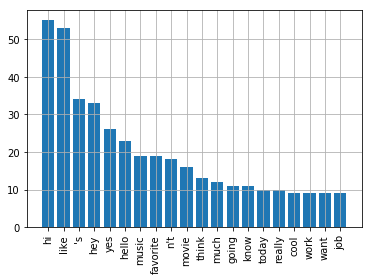

In [5]:
favorite_words = evaluation_res['data']['favorite_words']

fig,ax = plt.subplots(1,1)
ax.bar(range(len(favorite_words)),[w[1] for w in favorite_words])
ax.set_xticks(range(len(favorite_words)))
ax.set_xticklabels([w[0] for w in favorite_words],rotation=90)
plt.grid()

# Word level pie chart

In [6]:
cnts = []
lvls = evaluation_res['data']['word_level_composition'].keys()
for lvl in lvls:
    count = evaluation_res['data']['word_level_composition'][lvl]['count']
    cnts.append(count)

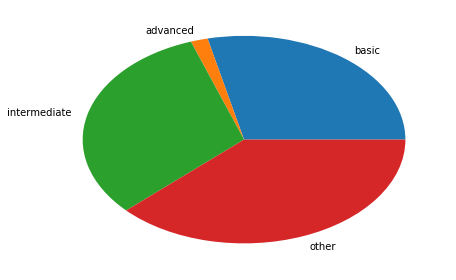

In [7]:
fig,ax = plt.subplots(1,1)
ax.pie(cnts,labels=lvls)
plt.tight_layout()

# Relevance score vs. time

In [8]:
relevance_scores = evaluation_res['data']['relevance_scores']
session_timestamps = [e['timestamp'] for e in relevance_scores]

## Get average relevance score of user utterance for each dialogue session

In [9]:
mean_session_scores = []
session_timestamps = []
for session in relevance_scores:
    session_timestamps.append(datetime.strptime(session['timestamp'].split('T')[0],'%Y-%m-%d'))
    scores = []
    for pair in session['scores']:
        scores.append(pair['score'])
    mean_session_score = np.mean(scores)
    mean_session_scores.append(mean_session_score)
        
    

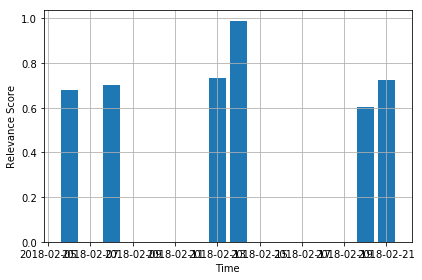

In [10]:
fig, ax = plt.subplots(1,1)

ax.bar(session_timestamps,mean_session_scores)

plt.ylabel('Relevance Score')
plt.xlabel('Time')
plt.grid()
plt.tight_layout()